In [1]:
import numpy as np
from scipy.fft import fft, fftfreq
import os

In [2]:
loc = '/home/saumya/Documents/Flame-diagonis-Dip/Schlieren-Data/Q200-p09/'
file_name = '011-pq.xlsx'
sampling_rate = 2932

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
files = pd.read_excel(loc+file_name)

In [5]:
dat = files.to_numpy()

In [6]:
sig = dat[:,1]

In [7]:
sig.shape

(200000,)

In [8]:
import sys  

In [9]:
sys.getsizeof(sig)

112

Text(0.5, 0, 'Time (sec)')

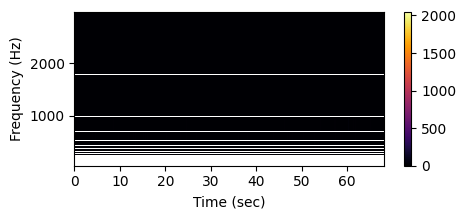

In [10]:
import pywt 



fs = sampling_rate
sampling_period = 1/fs
t = np.linspace(0, sig.shape[0], sig.shape[0])
t = t/fs

wavelet = 'morl'
scale = np.arange(1, 50)


f = pywt.scale2frequency(wavelet, scale)/sampling_period 

coef, freqs = pywt.cwt(sig, scale, wavelet=wavelet,
                       sampling_period=sampling_period)



# Show w.r.t. time and frequency
plt.figure(figsize=(5, 2))
neg = plt.pcolor(t, freqs, abs(coef), cmap='inferno')
plt.colorbar(neg)
# Set yscale, ylim and labels
# plt.yscale('log')
# plt.ylim([1, 500])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
# plt.savefig('egg_german.png', dpi=150)